<a href="https://colab.research.google.com/github/bnrm96/Novo_reposit-rio_maluco/blob/main/TCC_FEDERAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importa as biblioteca tudo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pydot
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns




##Construindo o algorítimo de identificação de facilidade de número

In [ ]:
def tem_repeticao(numero):
    # Converte o número em uma string para poder iterar sobre os dígitos
    numero = str(numero)
    soma = 1
    # Verifica se há algum dígito repetido
    for digito in numero:
        if numero.count(digito) > 3:
            return True

    # Verifica se os dígitos estão em sequência
    for i in range(len(numero) - 1):
        if int(numero[i]) + 1 == int(numero[i + 1]):
            soma = soma + 1
        if soma == 4:
            return True

    # Se não houver nenhum dígito repetido ou em sequência, retorna False
    return False

# Testa a função com alguns exemplos
print(tem_repeticao(1234))  # True (todos os digitos em sequência)
print(tem_repeticao(1224))  # False 
print(tem_repeticao(1235))  # False 
print(tem_repeticao(5678))  # False
print(tem_repeticao(5677))  # True (dígitos em sequência)
print(tem_repeticao(8888))


True
False
False
True
False
True


In [ ]:
# Lê o arquivo csv usando a função read_csv do Pandas
base = pd.read_csv('base_federal.csv',sep = ';')


In [ ]:
base

,NR_CANDIDATO,NR_PARTIDO,SG_UF_NASCIMENTO,NR_IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,Resultado
0,2727,27,0,47,2,7,9,100000.00,0,4
1,4307,43,0,52,2,8,3,100000.00,0,4
2,1501,15,0,45,2,8,1,1000000.00,0,3
3,5027,50,1,72,2,8,3,30000.00,0,4
4,1717,17,0,44,2,7,1,10000000.00,0,4
...,...,...,...,...,...,...,...,...,...,...
501,3307,33,1,39,2,6,3,3176572.53,0,4
502,3511,35,0,53,2,5,1,3176572.53,0,4
503,1227,12,1,66,2,8,3,3176572.53,0,4
504,7701,77,1,54,4,8,3,3176572.53,0,4


In [ ]:
base.shape

(506, 10)

##Aplicando a função que eu criei nos dados de número de candidato

In [ ]:
base['NR_CANDIDATO'] = base['NR_CANDIDATO'].apply(tem_repeticao)


In [ ]:
base

,NR_CANDIDATO,NR_PARTIDO,SG_UF_NASCIMENTO,NR_IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,Resultado
0,False,27,0,47,2,7,9,100000.00,0,4
1,False,43,0,52,2,8,3,100000.00,0,4
2,False,15,0,45,2,8,1,1000000.00,0,3
3,False,50,1,72,2,8,3,30000.00,0,4
4,False,17,0,44,2,7,1,10000000.00,0,4
...,...,...,...,...,...,...,...,...,...,...
501,False,33,1,39,2,6,3,3176572.53,0,4
502,False,35,0,53,2,5,1,3176572.53,0,4
503,False,12,1,66,2,8,3,3176572.53,0,4
504,False,77,1,54,4,8,3,3176572.53,0,4


##FAZENDO A MATRIZ DE CORRELAÇÃO LOGO ANTES QUE EU ME ESQUEÇA

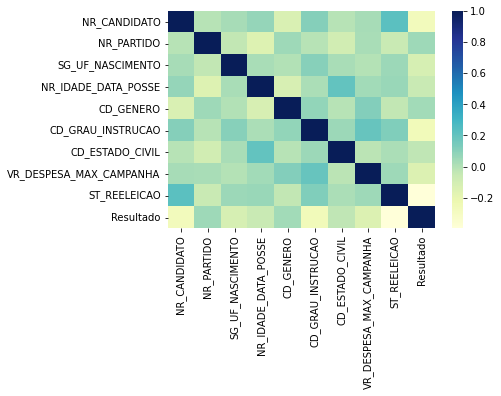

In [ ]:
corr = base.corr()

# Usamos o método heatmap do seaborn para plotar a matriz de correlação
sns.heatmap(corr, annot=False, cmap="YlGnBu")

# Exibimos o gráfico
plt.show()

# Separando o que eu vou usar de entrada do que eu vou usar de saída

In [ ]:
base = base.reindex(columns=['ST_REELEICAO','VR_DESPESA_MAX_CAMPANHA','CD_ESTADO_CIVIL','CD_GRAU_INSTRUCAO','CD_GENERO', 'NR_IDADE_DATA_POSSE','SG_UF_NASCIMENTO','NR_PARTIDO', 'NR_CANDIDATO', 'Resultado'])

In [ ]:
base

,ST_REELEICAO,VR_DESPESA_MAX_CAMPANHA,CD_ESTADO_CIVIL,CD_GRAU_INSTRUCAO,CD_GENERO,NR_IDADE_DATA_POSSE,SG_UF_NASCIMENTO,NR_PARTIDO,NR_CANDIDATO,Resultado
0,0,100000.00,9,7,2,47,0,27,False,4
1,0,100000.00,3,8,2,52,0,43,False,4
2,0,1000000.00,1,8,2,45,0,15,False,3
3,0,30000.00,3,8,2,72,1,50,False,4
4,0,10000000.00,1,7,2,44,0,17,False,4
...,...,...,...,...,...,...,...,...,...,...
501,0,3176572.53,3,6,2,39,1,33,False,4
502,0,3176572.53,1,5,2,53,0,35,False,4
503,0,3176572.53,3,8,2,66,1,12,False,4
504,0,3176572.53,3,8,4,54,1,77,False,4


In [ ]:
x = base.iloc[: , 1:9].values
y = base.iloc[: , 9].values

In [ ]:
x[0]

array([100000.0, 9, 7, 2, 47, 0, 27, False], dtype=object)

In [ ]:
y[0]

4

# Transformando as variáveis que são letras em variáveis numéricas

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x[:,3] = label_encoder.fit_transform(x[:,3])
x[:,4] = label_encoder.fit_transform(x[:,4])
x[:,11] = label_encoder.fit_transform(x[:,11])

In [ ]:
x[1]

array([100000.0, 3, 8, 2, 52, 0, 43, False], dtype=object)

# Normalizando esse treco

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(x)

In [ ]:
print(X[1])

[-1.76176689 -0.02697106  0.74315143 -0.64911348  0.45663926 -0.51785174
  0.45444424 -0.25546655]


# Vamos organizar a saída pra que seja uma variável binária mas com o 1 em apenas uma das casas

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
y.shape

(506,)

# Pra isso preciso fazer o reshape do y

In [ ]:
y = y.reshape(-1, 1)
y.shape

(506, 1)

Agora vamos fazer isso de fato

In [ ]:
y = onehot.fit_transform(y).toarray()
y

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

# Aqui vamos organizar o treinamento da rede neural
(lembrando que a gente ta usando 70% das amostras como treinamento e 30% de teste) 

In [ ]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.35, shuffle ='false' )

In [ ]:
X_treinamento.shape

(328, 8)

In [ ]:
X_teste.shape

(178, 8)

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

tf.__version__

'2.9.2'

# Só pra conferir se temos a quantidade de neuronios nas camadas corretamente

In [ ]:
neuronios_entrada = X.shape[1]
neuronios_entrada

8

In [ ]:
neuronios_oculta = int(np.ceil((X.shape[1] + y.shape[1]) / 2))
neuronios_oculta

6

In [ ]:
neuronios_saida = y.shape[1]
neuronios_saida

4

# Criando as variáveis de pesos

In [ ]:
W = {'oculta': tf.Variable(tf.random.normal([neuronios_entrada, neuronios_oculta])),
     'saida': tf.Variable(tf.random.normal([neuronios_oculta, neuronios_saida]))}

# Criando as variáveis de baias

In [ ]:
b = {'oculta': tf.Variable(tf.random.normal([neuronios_oculta])),
     'saida': tf.Variable(tf.random.normal([neuronios_saida]))}

# Definindo o teste

In [ ]:
X_treinamento = tf.convert_to_tensor(X_treinamento, dtype = tf.float32, name = 'X')
y_treinamento = tf.convert_to_tensor(y_treinamento, dtype = tf.float32, name = 'y')
X_teste = tf.convert_to_tensor(X_teste, dtype = tf.float32, name = 'X')
y_teste = tf.convert_to_tensor(y_teste, dtype = tf.float32, name = 'y')

# Definindo o detalhes de treinamento

In [ ]:
def mlp(x, W, bias):
    camada_oculta = tf.add(tf.matmul(x, W['oculta']), bias['oculta'])
    camada_oculta_ativacao = tf.nn.relu(camada_oculta)
    camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, W['saida']), b['saida'])
    return camada_saida

# Primeiro preciso criar o exemplo de modelo e a variavel erro
Perceber que o softmax já existe aqui

In [ ]:
with tf.GradientTape() as tape:
    modelo = mlp(X_treinamento, W, b)
    erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_treinamento, logits = modelo))

In [ ]:
var_list = [W['oculta'], W['saida'], b['oculta'], b['saida']]

## Fazendo o primeiro treinamento

In [ ]:
W['oculta']

<tf.Variable 'Variable:0' shape=(8, 6) dtype=float32, numpy=
array([[ 0.3274685 , -0.8426258 ,  0.3194337 , -1.4075519 , -2.3880599 ,
        -1.0392479 ],
       [-0.5573232 ,  0.539707  ,  1.6994323 ,  0.28893656, -1.5066116 ,
        -0.26454744],
       [-0.59722406, -1.9171132 , -0.62044144,  0.8504023 , -0.40604794,
        -3.0258412 ],
       [ 0.9058464 ,  0.29855987, -0.22561555, -0.7616443 , -1.891714  ,
        -0.9384712 ],
       [ 0.77852213, -0.47338897,  0.97772694,  0.24694404,  0.20573747,
        -0.5256233 ],
       [ 0.32410017,  0.02545409, -0.10638497, -0.6369475 ,  1.1603122 ,
         0.2507359 ],
       [-0.41728497,  0.40125778, -1.4145442 , -0.59318566, -1.6617213 ,
         0.33567193],
       [ 0.10815629,  0.2347968 , -0.56668764, -0.35819843,  0.88698626,
         0.5274477 ]], dtype=float32)>

In [ ]:
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.0001)
gradientes = tape.gradient(erro, var_list)
otimizador.apply_gradients(zip(gradientes, var_list))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

Verificando `W['oculta']` depois da atualização.

In [ ]:
W['oculta']

<tf.Variable 'Variable:0' shape=(8, 6) dtype=float32, numpy=
array([[ 0.32756844, -0.8427258 ,  0.3193337 , -1.4076519 , -2.38796   ,
        -1.0391479 ],
       [-0.5574231 ,  0.53980696,  1.6993322 ,  0.2890364 , -1.5065116 ,
        -0.26444745],
       [-0.597324  , -1.9172132 , -0.62054145,  0.8505022 , -0.40614793,
        -3.0257413 ],
       [ 0.90594643,  0.2984599 , -0.22551556, -0.7617443 , -1.891614  ,
        -0.9383712 ],
       [ 0.7784222 , -0.47328898,  0.9776269 ,  0.2468441 ,  0.20563751,
        -0.5255233 ],
       [ 0.32400018,  0.02555407, -0.10648496, -0.6370475 ,  1.1602122 ,
         0.25063592],
       [-0.41718498,  0.4011578 , -1.4144442 , -0.5932856 , -1.6616213 ,
         0.33557194],
       [ 0.1080563 ,  0.23489678, -0.5665876 , -0.3580985 ,  0.8870863 ,
         0.5275477 ]], dtype=float32)>

### Treinamento

Como `X_treinamento` e `y_treinamento` já são tensores, vou convertê-los em um dataset para gerar batches.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((X_treinamento, y_treinamento))
dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(8,), dtype=tf.float32, name=None), TensorSpec(shape=(4,), dtype=tf.float32, name=None))>

In [ ]:
batch_size = 8
dataset = dataset.batch(batch_size)
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

Verificando o primeiro batch.

In [ ]:
next(iter(dataset))

(<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
 array([[-1.047661  , -0.8799308 , -0.7031356 , -0.6491135 , -0.6456628 ,
         -0.51785177, -1.0573478 , -0.25546655],
        [ 0.6793426 , -0.02697106,  0.7431514 ,  1.5405626 ,  0.28705433,
         -0.51785177, -1.2137401 , -0.25546655],
        [ 1.3326919 , -0.8799308 ,  0.7431514 , -0.6491135 , -1.5783799 ,
         -0.51785177,  2.9045901 , -0.25546655],
        [ 1.3326919 , -0.02697106,  0.7431514 , -0.6491135 ,  2.6612432 ,
         -0.51785177, -0.37964794, -0.25546655],
        [ 0.6793426 , -0.02697106,  0.7431514 ,  1.5405626 , -1.0696251 ,
         -0.51785177,  0.506575  , -0.25546655],
        [ 0.14251548, -0.02697106,  0.7431514 , -0.6491135 , -0.7304552 ,
         -0.51785177, -1.0052171 , -0.25546655],
        [ 0.6793426 , -0.8799308 ,  0.02000792, -0.6491135 , -0.22170046,
         -0.51785177, -1.0052171 , -0.25546655],
        [ 0.6793426 , -0.02697106,  0.7431514 , -0.6491135 , -0.47607785,
         -0.5178

Agora precisamos instanciar o dataset de novo para ele reiniciar a geração de batches.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((X_treinamento, y_treinamento)).batch(batch_size)

In [ ]:
for epoca in range(240):
    for X_batch, y_batch in dataset:
        erro_medio = 0.0
        with tf.GradientTape() as tape:
            modelo = mlp(X_batch, W, b)
            erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_batch, logits = modelo))
        gradientes = tape.gradient(erro, var_list)
        otimizador.apply_gradients(zip(gradientes, var_list))
        erro_medio += erro.numpy()
    if epoca % 20 == 0:
        print('Época: ' + str((epoca + 1)) + ' erro: ' + str(erro_medio))

Época: 1 erro: 4.330075740814209
Época: 21 erro: 3.512666940689087
Época: 41 erro: 2.9712586402893066
Época: 61 erro: 2.582953453063965
Época: 81 erro: 2.279195547103882
Época: 101 erro: 2.0212461948394775
Época: 121 erro: 1.7962963581085205
Época: 141 erro: 1.601029396057129
Época: 161 erro: 1.4355015754699707
Época: 181 erro: 1.2975279092788696
Época: 201 erro: 1.1859068870544434
Época: 221 erro: 1.097460150718689


In [ ]:
# previsões
previsoes_teste = mlp(X_teste, W, b)
previsoes_teste

<tf.Tensor: shape=(178, 4), dtype=float32, numpy=
array([[-6.8376637e+00, -9.2822819e+00, -5.2376485e+00, -4.0767097e+00],
       [-5.4428682e+00, -5.2881670e+00,  1.3789804e+00,  2.9853935e+00],
       [-4.8204098e+00, -8.1634521e+00, -4.0615525e+00, -3.8950825e-01],
       [-9.1460447e+00, -1.0655995e+01, -6.9359078e+00, -4.9465065e+00],
       [-8.1100896e-02, -8.8062167e-01,  8.3060646e-01, -6.3673151e-01],
       [ 9.8658359e-01, -2.5995300e+00, -6.8007284e-01,  2.8018622e+00],
       [-9.9658036e-01, -1.2702966e-01,  1.0146594e+00,  1.2566173e-01],
       [-2.6527739e-01, -1.4489279e+00,  1.1383977e+00, -4.1690469e-01],
       [ 2.1988559e-01, -1.4131557e+00, -9.6582979e-01,  6.0475707e-01],
       [ 3.8553727e+00,  1.9024849e+00, -1.1817353e+00,  4.0246229e+00],
       [-2.8356683e+00, -4.1979065e+00, -1.7939320e+00, -2.1389623e+00],
       [-5.7779627e+00, -7.6737504e+00, -1.1180439e+00, -1.3551269e+00],
       [-3.3620818e+00, -5.2461610e+00, -2.9603488e+00, -1.2582333e+00],
 

In [ ]:
previsoes_teste = tf.nn.softmax(previsoes_teste)
previsoes_teste

<tf.Tensor: shape=(178, 4), dtype=float32, numpy=
array([[4.57565673e-02, 3.96980532e-03, 2.26637200e-01, 7.23636508e-01],
       [1.82003874e-04, 2.12454761e-04, 1.67021275e-01, 8.32584202e-01],
       [1.14707472e-02, 4.05253581e-04, 2.44996119e-02, 9.63624358e-01],
       [1.29881212e-02, 2.86934734e-03, 1.18412234e-01, 8.65730286e-01],
       [2.21639931e-01, 9.96369794e-02, 5.51566005e-01, 1.27157122e-01],
       [1.35881186e-01, 3.76469758e-03, 2.56649051e-02, 8.34689260e-01],
       [7.17867464e-02, 1.71271592e-01, 5.36431909e-01, 2.20509768e-01],
       [1.60369545e-01, 4.90985885e-02, 6.52724981e-01, 1.37806907e-01],
       [3.36667746e-01, 6.57628477e-02, 1.02861263e-01, 4.94708151e-01],
       [4.28674430e-01, 6.08133860e-02, 2.78316834e-03, 5.07729053e-01],
       [1.64005622e-01, 4.19997014e-02, 4.64813858e-01, 3.29180658e-01],
       [5.26011363e-03, 7.90068938e-04, 5.55612683e-01, 4.38337207e-01],
       [9.22165588e-02, 1.40140513e-02, 1.37809530e-01, 7.55959749e-01],
 

In [ ]:
previsoes_teste = tf.argmax(previsoes_teste, axis = 1).numpy()
previsoes_teste

array([3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 0, 3, 2, 3,
       3, 3, 2, 2, 3, 3, 0, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3,
       3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 0, 3, 3, 2, 3, 2, 3, 3,
       2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 2,
       3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 3, 2, 2, 0, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3,
       2, 3])

In [ ]:
y_teste2 = tf.argmax(y_teste, axis = 1).numpy()
y_teste2

array([3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 0, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 0, 3, 0, 2, 2, 3, 3, 3, 2, 3, 3,
       2, 0, 3, 3, 3, 2, 2, 3, 3, 3, 0, 2, 0, 3, 3, 3, 3, 2, 1, 2, 3, 2,
       3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 0, 3, 2, 3, 3, 3, 2,
       3, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 0, 0,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3,
       2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 2])

In [ ]:
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(y_teste2, previsoes_teste)
taxa_acerto

0.4606741573033708

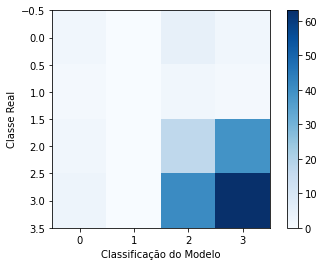

In [ ]:
# Suponha que temos as seguintes previsões e classes reais
# para um conjunto de dados:


# Geramos a matriz de confusão usando a função confusion_matrix do scikit-learn
confusion_mat = confusion_matrix(y_teste2, previsoes_teste)

# Criamos um gráfico usando matplotlib
plt.imshow(confusion_mat, cmap='Blues')

# Adicionamos rótulos nas linhas e colunas
class_names = ['0', '1','2','3']


# Adicionamos rótulos na barra de cores
plt.colorbar()

# Adicionamos rótulos nos eixos
plt.xlabel('Classificação do Modelo')
plt.ylabel('Classe Real')

# Exibimos o gráfico
plt.show()


In [ ]:
erro_medio

1.0348743200302124

In [ ]:
importancia = [15 , 8, 12, 4, 10, 17, 8 ,7, 15]

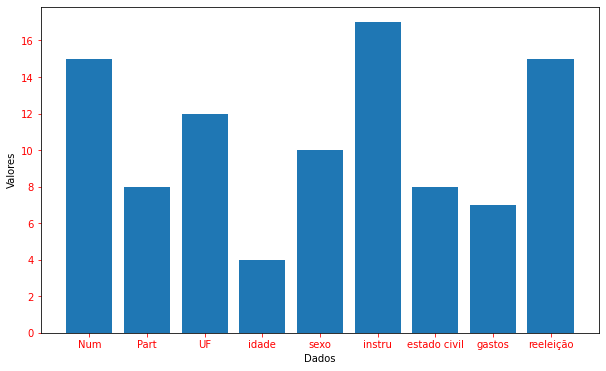

In [ ]:
import matplotlib.pyplot as plt

# Dados para o eixo x e y
x = [15 , 8, 12, 4, 10, 17, 8 ,7, 15]
y = ['Num', 'Part', 'UF', 'idade', 'sexo', 'instru', 'estado civil', 'gastos', 'reeleição']

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(y, x)
# Adiciona rótulos ao eixo x e y
plt.xlabel('Dados')
plt.ylabel('Valores')
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')
# Exibe o gráfico
plt.show()
